In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import probplot

# Read file
parquet_path = '/home/MONLEON-JUAN/MCNPy/mcnpy/sampling/test_legendre/ace/293.6K/perturbation_matrix_20250810_182120_master.parquet'
df = pd.read_parquet(parquet_path)

In [4]:
df

,Sample_ID,Fe56_MT2_E0-E1,Fe56_MT2_E1-E2,Fe56_MT2_E2-E3,Fe56_MT2_E3-E4,Fe56_MT2_E4-E5,Fe56_MT2_E5-E6,Fe56_MT2_E6-E7,Fe56_MT2_E7-E8,Fe56_MT2_E8-E9,...,Fe56_MT2_E46-E47,Fe56_MT2_E47-E48,Fe56_MT2_E48-E49,Fe56_MT2_E49-E50,Fe56_MT2_E50-E51,Fe56_MT2_E51-E52,Fe56_MT2_E52-E53,Fe56_MT2_E53-E54,Fe56_MT2_E54-E55,Fe56_MT2_E55-E56
0,1,0.989892,0.989892,0.989892,0.989892,0.989892,0.989892,0.989892,0.989892,0.989920,...,1.032166,1.024788,1.024788,1.024788,0.972654,0.919965,0.916628,0.914121,0.919827,0.945292
1,2,1.020667,1.020667,1.020667,1.020667,1.020667,1.020667,1.020667,1.020667,1.020791,...,1.011485,1.012158,1.012158,1.012158,1.058103,1.106929,1.061584,1.038823,1.041936,1.051116


Column: Al26_MT2_L1_E5-E6
Mean: 0.999875
Std Dev: 0.931071
Number of samples: 1024


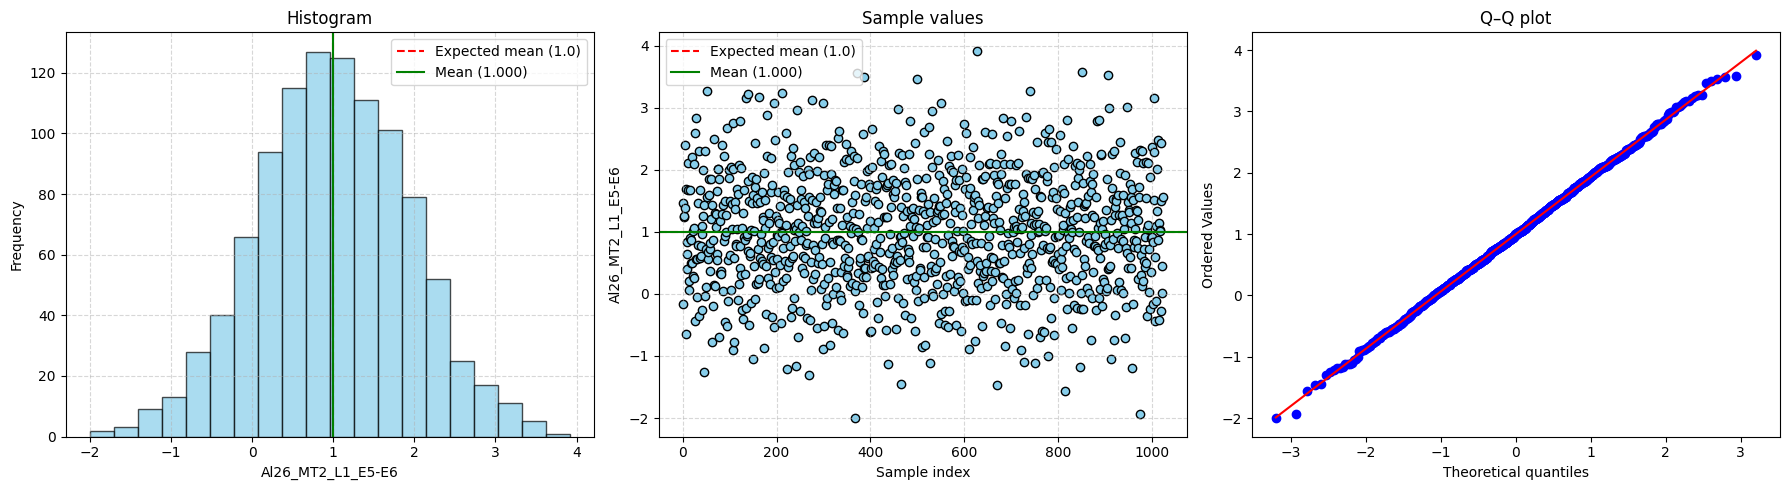

In [ ]:


# Choose the 6th column (index 5 if zero-based)
fixed_column = df.columns[6]
values = df[fixed_column].astype(float).values

# Stats
mean_val = np.mean(values)
std_val = np.std(values, ddof=1)

print(f"Column: {fixed_column}")
print(f"Mean: {mean_val:.6f}")
print(f"Std Dev: {std_val:.6f}")
print(f"Number of samples: {len(values)}")

# Create subplots: histogram + scatter + Q-Q
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Histogram
axes[0].hist(values, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].axvline(1.0, color='red', linestyle='--', label='Expected mean (1.0)')
axes[0].axvline(mean_val, color='green', linestyle='-', label=f'Mean ({mean_val:.3f})')
axes[0].set_title('Histogram')
axes[0].set_xlabel(fixed_column)
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.5)

# 2. Scatter
axes[1].scatter(range(len(values)), values, color='skyblue', edgecolor='black')
axes[1].axhline(1.0, color='red', linestyle='--', label='Expected mean (1.0)')
axes[1].axhline(mean_val, color='green', linestyle='-', label=f'Mean ({mean_val:.3f})')
axes[1].set_title('Sample values')
axes[1].set_xlabel('Sample index')
axes[1].set_ylabel(fixed_column)
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.5)

# 3. Q-Q plot
probplot(values, dist="norm", plot=axes[2])
axes[2].get_lines()[1].set_color('red')  # Line of best fit in red
axes[2].set_title('Q–Q plot')

plt.tight_layout()
plt.show()
